In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
data = pd.read_csv("loan_data.csv")
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [ ]:
data.shape

(9578, 14)

In [ ]:
data.isna().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [ ]:
data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [ ]:
data.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

In [ ]:
data.purpose.value_counts()

purpose
debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='not.fully.paid'>

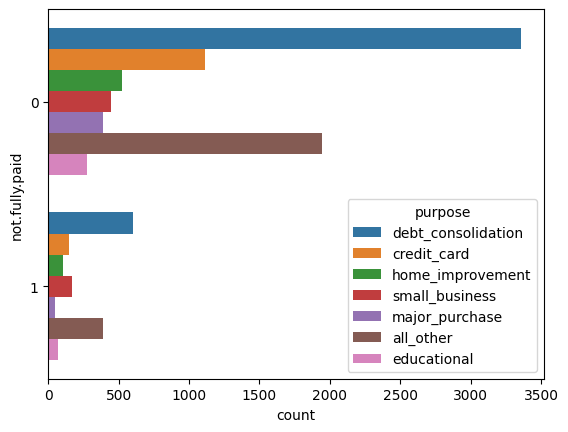

In [ ]:
sns.countplot(y="not.fully.paid", hue="purpose", data=data)

In [ ]:
new_data = pd.get_dummies(data["purpose"])
new_data.columns = ["purpose_" + column for column in new_data.columns]
data[new_data.columns] = new_data
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,...,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,...,0,0,0,False,False,True,False,False,False,False
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,...,0,0,0,False,True,False,False,False,False,False
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,...,0,0,0,False,False,True,False,False,False,False
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,...,0,0,0,False,False,True,False,False,False,False
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,...,1,0,0,False,True,False,False,False,False,False


<Axes: xlabel='count', ylabel='not.fully.paid'>

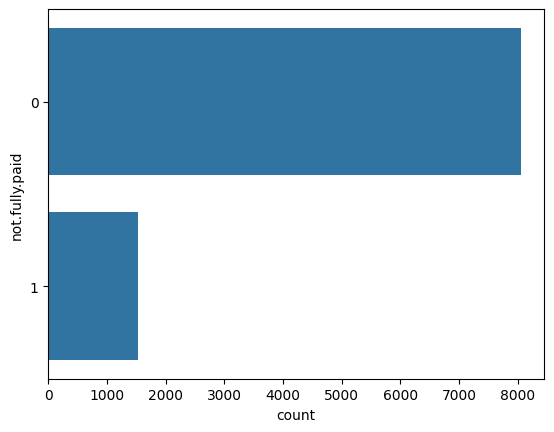

In [ ]:
sns.countplot(y="not.fully.paid", data=data)

In [ ]:
data=data.drop('purpose',axis=1)

In [ ]:
data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,False,False,True,False,False,False,False
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,False,True,False,False,False,False,False
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,False,False,True,False,False,False,False
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,False,False,True,False,False,False,False
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,False,True,False,False,False,False,False


In [ ]:
data.isnull().sum()

credit.policy                 0
int.rate                      0
installment                   0
log.annual.inc                0
dti                           0
fico                          0
days.with.cr.line             0
revol.bal                     0
revol.util                    0
inq.last.6mths                0
delinq.2yrs                   0
pub.rec                       0
not.fully.paid                0
purpose_all_other             0
purpose_credit_card           0
purpose_debt_consolidation    0
purpose_educational           0
purpose_home_improvement      0
purpose_major_purchase        0
purpose_small_business        0
dtype: int64

<Axes: >

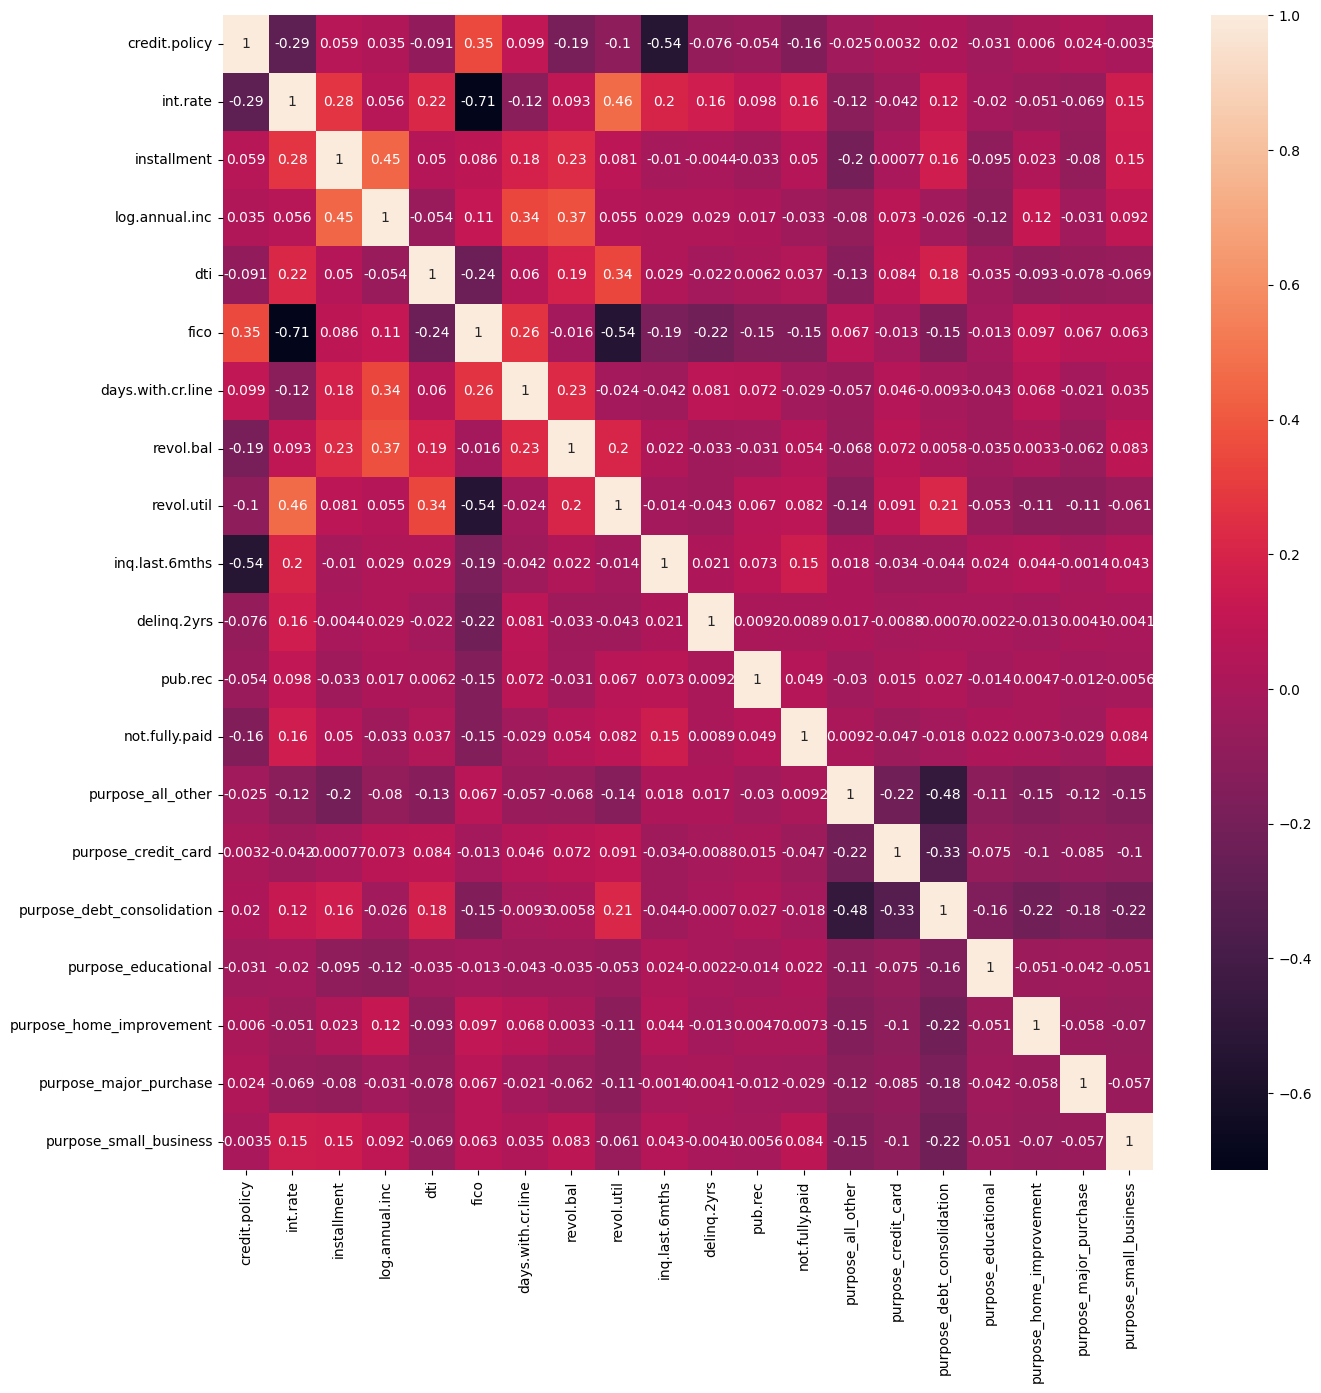

In [ ]:
correlation_scores = data.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_scores, annot=True)

<Axes: xlabel='count', ylabel='not.fully.paid'>

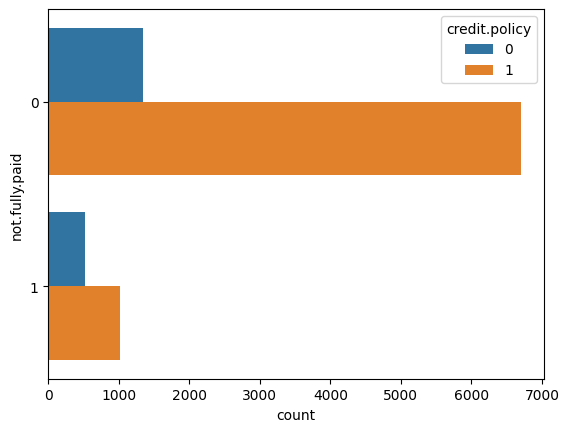

In [ ]:
sns.countplot(y="not.fully.paid", hue="credit.policy", data=data)

<Axes: >

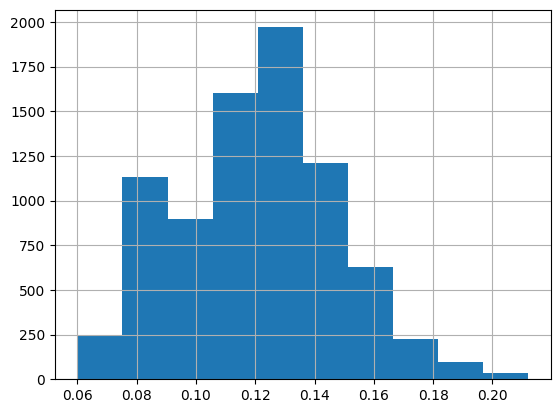

In [ ]:
data[data["not.fully.paid"]==0]["int.rate"].hist()

In [ ]:
data[data["credit.policy"]==0]["int.rate"].mean()

0.13867955032119914

<Axes: >

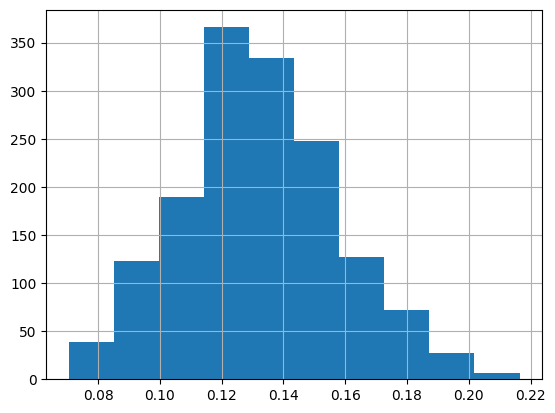

In [ ]:
data[data["not.fully.paid"]==1]["int.rate"].hist()

In [ ]:
data[data["credit.policy"]==1]["int.rate"].mean()

0.11875396887159533

In [ ]:
from sklearn.model_selection import train_test_split
X=data.drop('not.fully.paid',axis=1)
Y=data['not.fully.paid']

In [ ]:
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(X, Y)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

(mi_scores*100).head()

int.rate                  1.699051
inq.last.6mths            1.617843
purpose_small_business    0.933714
credit.policy             0.740333
installment               0.667927
Name: MI Scores, dtype: float64

In [ ]:
X=data[['credit.policy','int.rate','inq.last.6mths','fico']]
Y=data['not.fully.paid']

In [ ]:
X_Temp,X_Test,Y_Temp,Y_Test = train_test_split(X,Y,random_state=42,test_size=0.35)
X_Train,X_Val,Y_Train,Y_Val=train_test_split(X_Temp,Y_Temp,random_state=42,test_size=0.25)

In [ ]:
loan_model=tf.keras.Sequential([
                        tf.keras.layers.Dense(units=108,activation='relu',input_shape=[4,]),
                        tf.keras.layers.BatchNormalization(),
                        tf.keras.layers.Dropout(0.3),
                        tf.keras.layers.Dense(units=324,activation='relu'),
                        tf.keras.layers.BatchNormalization(),
                        tf.keras.layers.Dropout(0.3),
                        tf.keras.layers.Dense(units=648,activation='relu'),
                        tf.keras.layers.BatchNormalization(),
                        tf.keras.layers.Dropout(0.3),
                        tf.keras.layers.Dense(units=1296,activation='relu'),
                        tf.keras.layers.BatchNormalization(),
                        tf.keras.layers.Dropout(0.3),
                        tf.keras.layers.Dense(units=1,activation='sigmoid')])

In [ ]:
loan_model.compile(optimizer='Adamax',loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = loan_model.fit(
    X_Train, Y_Train,
    validation_data=(X_Val, Y_Val),
    batch_size=40,
    epochs=40,
    verbose=1
)

Epoch 1/40
117/117 [==============================] - 6s 27ms/step - loss: 0.7102 - accuracy: 0.6806 - val_loss: 0.6942 - val_accuracy: 0.8382
Epoch 2/40
117/117 [==============================] - 4s 34ms/step - loss: 0.5358 - accuracy: 0.7976 - val_loss: 0.4990 - val_accuracy: 0.8382
Epoch 3/40
117/117 [==============================] - 3s 24ms/step - loss: 0.5293 - accuracy: 0.8029 - val_loss: 0.4807 - val_accuracy: 0.8356
Epoch 4/40
117/117 [==============================] - 3s 24ms/step - loss: 0.5216 - accuracy: 0.8128 - val_loss: 0.4446 - val_accuracy: 0.8285
Epoch 5/40
117/117 [==============================] - 3s 24ms/step - loss: 0.5121 - accuracy: 0.8156 - val_loss: 0.4936 - val_accuracy: 0.8343
Epoch 6/40
117/117 [==============================] - 4s 30ms/step - loss: 0.4955 - accuracy: 0.8158 - val_loss: 0.4366 - val_accuracy: 0.8298
Epoch 7/40
117/117 [==============================] - 3s 26ms/step - loss: 0.4845 - accuracy: 0.8222 - val_loss: 0.4523 - val_accuracy: 0.8382

Minimum validation loss: 0.41921141743659973


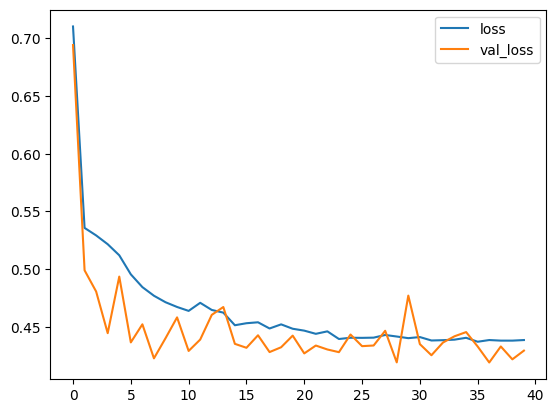

In [ ]:
data_history  = pd.DataFrame(history.history)
data_history.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(data_history['val_loss'].min()))

In [ ]:
Y_Pred=loan_model.predict(X_Test)
Y_Pred=(Y_Pred>0.5)

105/105 [==============================] - 1s 5ms/step


In [ ]:
accuracy_score(Y_Test,Y_Pred)

0.8407396361467343

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

clf = RandomForestClassifier(random_state=42)
clf.fit(X_Train, Y_Train)

y_pred = clf.predict(X_Test)

print("Accuracy:", accuracy_score(Y_Test, y_pred))
print("Precision:", precision_score(Y_Test, y_pred, average='weighted'))
print("Recall:", recall_score(Y_Test, y_pred, average='weighted'))
print("F1 Score:", f1_score(Y_Test, y_pred, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(Y_Test, y_pred))

Accuracy: 0.7936176558305995
Precision: 0.7444769951727264
Recall: 0.7936176558305995
F1 Score: 0.7649615253045416
Confusion Matrix:
 [[2603  216]
 [ 476   58]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

dt_clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_Train, Y_Train)

y_pred = clf.predict(X_Test)

print("Accuracy:", accuracy_score(Y_Test, y_pred))
print("Precision:", precision_score(Y_Test, y_pred, average='weighted'))
print("Recall:", recall_score(Y_Test, y_pred, average='weighted'))
print("F1 Score:", f1_score(Y_Test, y_pred, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(Y_Test, y_pred))

Accuracy: 0.7936176558305995
Precision: 0.7444769951727264
Recall: 0.7936176558305995
F1 Score: 0.7649615253045416
Confusion Matrix:
 [[2603  216]
 [ 476   58]]
